In [19]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


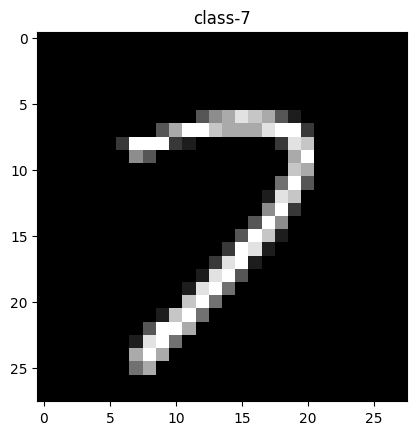

Train image 586-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  86 141 170 226 198 170
   86  29   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  86 170 255 255 198 170 170 170 226
  255 255  57   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  57 255 255

In [20]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = r'C:\Users\Saikat\Downloads\mds_saikat_kumar_ghosh_version_no1\MDS'# Change your data path

train_image_filename = os.path.join(dataset_path, 'train-images-idx3-ubyte.gz')
train_label_filename =os.path.join(dataset_path, 'train-labels-idx1-ubyte.gz')

test_image_filename = os.path.join(dataset_path, 't10k-images-idx3-ubyte.gz')
test_label_filename = os.path.join(dataset_path, 't10k-labels-idx1-ubyte.gz')

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [21]:

def image_label_selector(data, tags, num_samples_per_group=600):
    selected_data = []
    selected_tags = []
    group_counts = np.bincount(tags)
    for group_tag in range(10):
        group_indices = np.where(tags == group_tag)[0]
        np.random.shuffle(group_indices)
        selected_indices = np.random.choice(group_indices, size=num_samples_per_group, replace=False)
        selected_data.extend(data[selected_indices])
        selected_tags.extend(tags[selected_indices])

    return np.array(selected_data), np.array(selected_tags)

selected_data, selected_labels = image_label_selector(train_images, train_labels)



In [22]:
def euclidean_distance_calculator(x1, x2):
    return np.linalg.norm(x1 - x2)

#Function to calculate pairwise distances
def pairwise_distance_calculator(data):
    n = data.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance_calculator(data[i], data[j])
    return distance_matrix

In [23]:
def multidimensional_scaling(Distance_mat, d=2):
    n = Distance_mat.shape[0]
    I = np.identity(n)
    O = np.ones((n, n)) / n
    M = I - O
    B = -0.5 * np.dot(M, np.dot(Distance_mat ** 2, M))
    
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    
    indices = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]
    eigenvalues = np.maximum(eigenvalues, 0)
    eigenvalues_root = np.sqrt(eigenvalues[:d])
    scaled_eigenvectors = eigenvectors[:, :d] * eigenvalues_root
    
    return scaled_eigenvectors


In [24]:
Distance_matrix = pairwise_distance_calculator(selected_data.reshape(selected_data.shape[0], -1))
low_dimensional_representation = multidimensional_scaling(Distance_matrix)

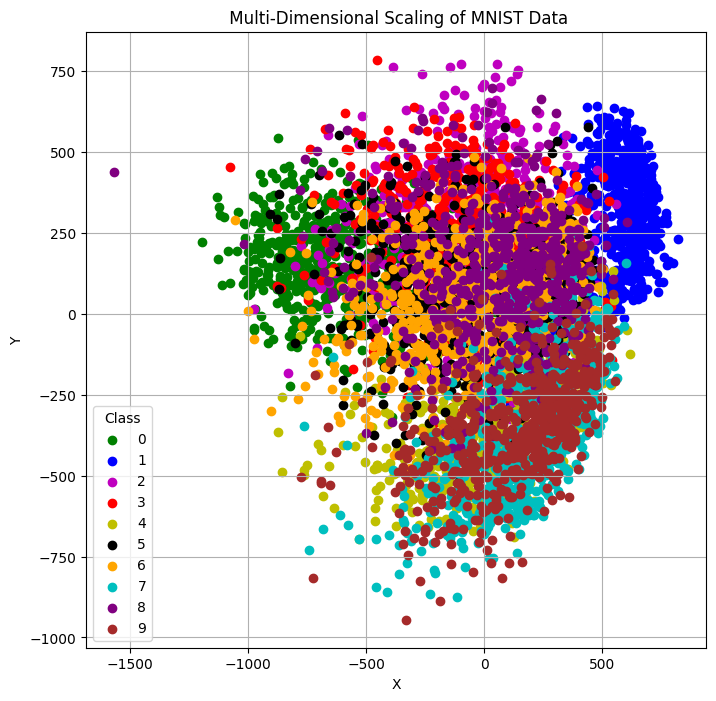

In [28]:
colors = ['g', 'b',  'm','r', 'y', 'k', 'orange', 'c','purple', 'brown']

plt.figure(figsize=(8, 8))
for class_label in range(10):
    class_indices = np.where(selected_labels == class_label)[0]
    class_points = low_dimensional_representation[class_indices]
    plt.scatter(class_points[:, 0], class_points[:, 1], color=colors[class_label], label=str(class_label))

plt.title(" Multi-Dimensional Scaling of MNIST Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="Class")
plt.grid(True)


In [29]:
pd.DataFrame(Distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.000000,2787.007176,2966.678446,2802.322430,2507.643715,2985.181904,2654.941619,2991.830543,2883.727796,2875.263118,...,3068.564322,2981.379211,2925.127690,3087.081470,2973.341555,3052.770709,2708.331590,2953.135960,3164.192946,3015.298327
1,2425.435425,0.000000,2789.716115,2218.083858,2329.961373,2627.360653,2364.424243,2635.246668,2734.360437,2415.299774,...,2811.697708,2681.755582,2959.479853,2650.151882,2716.492407,2900.856770,2435.319486,2882.487988,2915.298269,2744.855734
2,2538.792823,2763.902314,0.000000,2729.220768,2367.172153,2902.576442,2352.034013,2925.354508,2733.703898,2691.102934,...,2885.860357,2876.860963,2895.120896,2976.558583,2872.062499,2800.847015,2600.783151,2745.001457,2906.868418,2833.290490
3,2308.984842,2251.532811,2548.789124,0.000000,2030.525548,2411.203434,2080.871452,2547.436555,2342.677741,2043.435098,...,2537.920015,2408.040905,2670.549943,2593.401434,2536.572293,2729.530729,2233.387785,2616.430202,2712.088863,2466.046026
4,2400.724266,2489.732516,2832.708951,2406.689427,0.000000,2831.927965,1961.810898,2831.042034,2671.164727,2382.813253,...,3101.950354,2897.786569,3057.220470,3045.780524,2827.395798,3014.753721,2602.804065,2790.009498,3083.012812,2762.242386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2286.709645,2438.673820,2524.328029,2384.315835,2418.853447,2297.418987,2261.997347,2455.396302,2406.407904,2222.543363,...,2157.389626,2101.066158,2067.360394,2221.680670,1858.752001,0.000000,1855.092181,1926.980280,2193.516355,1966.925265
5996,3141.732643,3405.298959,3413.972613,3360.093600,3358.065663,3168.497909,3159.557089,3305.660902,3350.558162,3172.434081,...,3086.640731,3027.568992,2784.694597,3067.682187,2966.616254,2948.033752,0.000000,2993.446509,3164.630626,2968.770453
5997,2133.373854,2274.140057,2459.409889,2308.387099,2403.669070,2017.395598,2223.515460,2297.035481,2269.707470,2148.280708,...,2027.921350,2017.492503,2126.517811,1958.174150,1998.870181,2148.704959,1888.462337,0.000000,1929.716819,1792.932235
5998,1999.925249,2090.746278,2233.783338,2094.969690,2084.474034,1739.207866,2011.222017,2044.757932,2061.336217,1875.197856,...,1669.641279,1678.784382,1934.047311,1665.733172,1794.108971,1865.285501,1705.531882,1633.263910,0.000000,1814.194863


In [30]:
pd.DataFrame(low_dimensional_representation)

,0,1
0,-603.887817,233.026121
1,-616.349503,143.643809
2,-382.916650,97.560820
3,-847.743667,221.747404
4,-901.426462,272.900979
...,...,...
5995,-59.975001,-471.055978
5996,-43.785208,-346.123162
5997,232.755555,-238.673434
5998,357.874756,-181.984532
